# Loading preprocessed HBN data

`
Authors: @mahtaao
`

Here I have two functions for reading preprocessed channel based epochs and corresponding STCs


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import numpy as np
import mne
import h5py

mne.set_log_level('warning')

# Change the following path to where the ds000117 and the extra folder are on your disk
data_path = os.path.expanduser("C:/Users/mahta/OneDrive/Documents/Work/Codes/IFT6168/TCL/data")
# epochs_fname = os.path.join(data_path, 'sub-02/sub-02-epo.fif') #MEG
epochs_fname = os.path.join(data_path, 'NDARAH239PGG.h5') #EEG

# dataset_name = epochs_fname.split('/')[-1].split('.')[0]
# print(dataset_name)

# Open the file
with h5py.File(epochs_fname, 'r') as f:
    print(f.keys())
    print(f['demographics'])
    print(f['power_data'])
    
    # Load the data
    data = f['power_data'][:]
    print(data.shape)
    info = f['demographics']
    
    # print demographics values
    for key in info:
        print(key)
    
    # The power_data dataset in your .h5 file has a shape of (86, 128, 501). 
    # This suggests that it contains 86 epochs, each with 128 channels and 501 time points.
    
    # # visualize data for each channel as timeseries
    # for i in range(data.shape[1]):
        
    #     plt.plot(data[5, i, :])
    #     plt.title('Channel {}'.format(i))
    #     plt.show()

<KeysViewHDF5 ['demographics', 'power_data']>
<HDF5 dataset "demographics": shape (1,), type "|V14">
<HDF5 dataset "power_data": shape (86, 128, 501), type "<f8">
(86, 128, 501)
(b'Male', 7)


C:\Users\mahta\AppData\Local\Temp\ipykernel_17028\551775337.py:9: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  data.compute_psd(method='welch',fmax=60).plot()
c:\Users\mahta\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


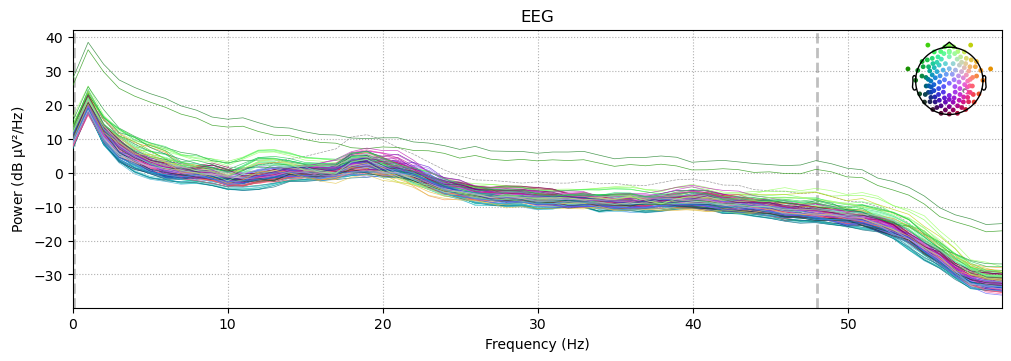

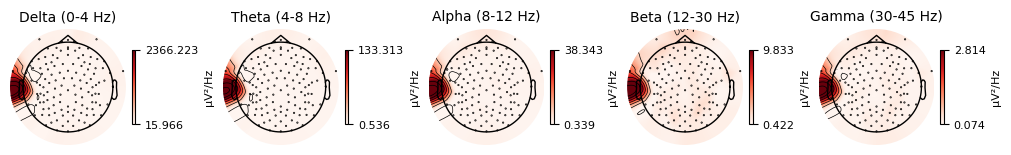

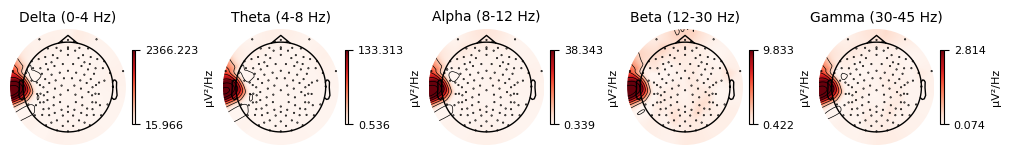

In [2]:
# epochs_fname = os.path.join(data_path, 'NDARAA773LUW/RestingState_epo.fif') #EEG
epochs_fname = os.path.join(data_path, 'RestingState_epo.fif') #EEG

# Visualize EEG signals and frequency power
data = mne.read_epochs(epochs_fname)
data['EC'].plot()
# demographics = data.info['demographics']
data.plot()
data.compute_psd(method='welch',fmax=60).plot()
data.compute_psd(method='welch',fmax=60).plot_topomap()

### Load metadata

In [21]:
ch_names = data.info['ch_names']
sfreq = data.info['sfreq']
# ch_types = data.info['ch_types']
print(data.info)
epochs = mne.EpochsArray(data.get_data(), data.info)

# convert epochs to numpy array
data_array = epochs.get_data()
print(data_array.shape)

<Info | 12 non-empty values
 bads: 1 items (E92)
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 128 EEG
 custom_ref_applied: True
 dig: 131 items (3 Cardinal, 128 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 48.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 128
 projs: []
 sfreq: 500.0 Hz
>
(94, 128, 501)


# Load and visualize the source reconstructed data in mesh and grids
mesh is mne.source_estimate & grid is mne.volumne_source_estimate

fsaverage
(83745, 3, 501)
<class 'numpy.ndarray'>


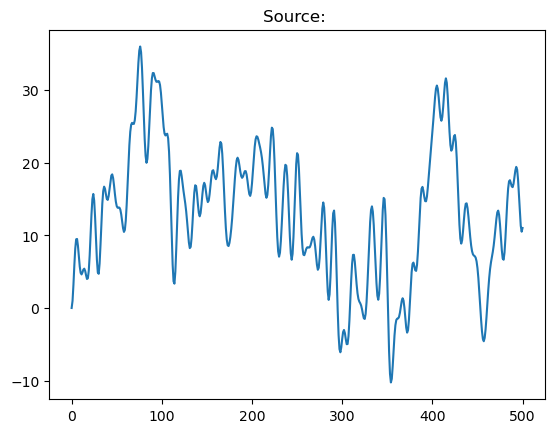

In [19]:
src = mne.read_source_estimate('data/SRC_LVL-ico6/NDARDZ058NZN_RS_EO_grid-stc.h5')
# print meta data
print(src.subject)
# convert MixedVectorSourceEstimate to np array
src_data = src.data
print(src_data.shape)
print(type(src_data))
plt.plot(src_data[99, 2, :])
plt.title('Source: ')
plt.show()


In [7]:
# Load a sample .h5 file
src = mne.read_source_estimate('data/SRC_LVL-ico6/NDARDZ058NZN_RS_EO_grid-stc.h5')
print('src type: ', src)
# stc = mne.read_source_estimate('data/SRC_LVL-ico6/NDARAA773LUW_RS_EO_mesh-stc.h5')

# os.environ['SUBJECTS_DIR'] = 'data/SRC_LVL-ico6'


# visualize MixedVectorSourceEstimate
src.plot(hemi='both', subjects_dir='data/SRC_LVL-ico6/MH8', initial_time=0.1, time_unit='s', size=(800, 800), smoothing_steps=5, subject='fsaverage')


src type:  <MixedVectorSourceEstimate | 83745 vertices, subject : fsaverage, tmin : 0.0 (ms), tmax : 1000.0 (ms), tstep : 2.0 (ms), data shape : (83745, 3, 501), ~960.9 MB>


TypeError: src must be an instance of src when stc is a mixed or volume source estimate, got <class 'NoneType'> instead.

## Read epochs and compute ERF

In [ ]:
# # Create an Info object
# info = mne.create_info(
#     # ch_names=['ch%d' % i for i in range(1, 129)],  # Names of the channels
#     sfreq=1000. / 3.,  # Sampling frequency
#     ch_types='eeg'  # Type of the channels
# )

# # Load the data
# with h5py.File(epochs_fname, 'r') as f:
#     data = f['power_data'][:]

# # Create the EpochsArray object
# epochs = mne.EpochsArray(data, info)

In [ ]:
epochs.pick_types(eeg=True)

Number of events,94
Events,1: 94
Time range,0.000 – 1.000 s
Baseline,off


Let's compute the evoked responses for two conditions: _faces_  and  _scrambled_

In [ ]:
# evoked_face = epochs['face'].average()
# evoked_scrambled = epochs['scrambled'].average()
eyes_open = data['EO'].average()
eyes_closed = data['EC'].average()
print(eyes_open, eyes_closed)

<Evoked | 'EO' (average, N=35), 0 – 1 s, baseline 0 – 0 s, 128 ch, ~651 kB> <Evoked | 'EC' (average, N=59), 0 – 1 s, baseline 0 – 0 s, 128 ch, ~651 kB>


Compute the contrast between the two conditions and look at it

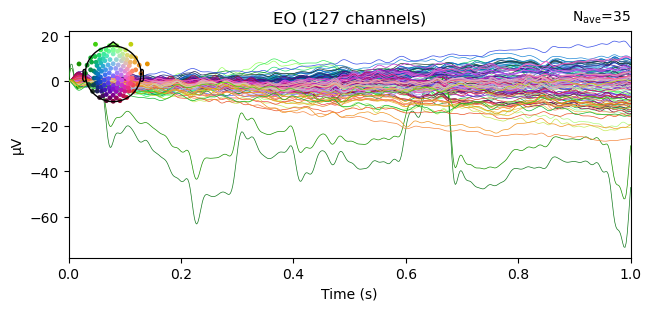

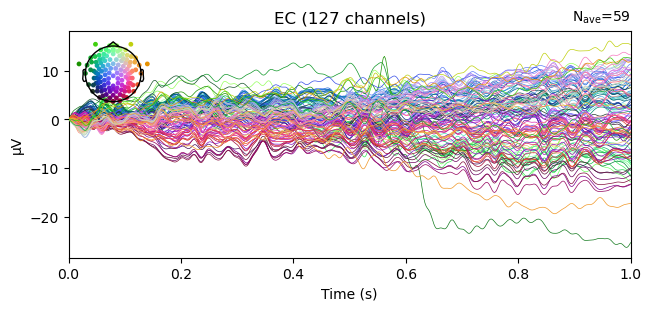

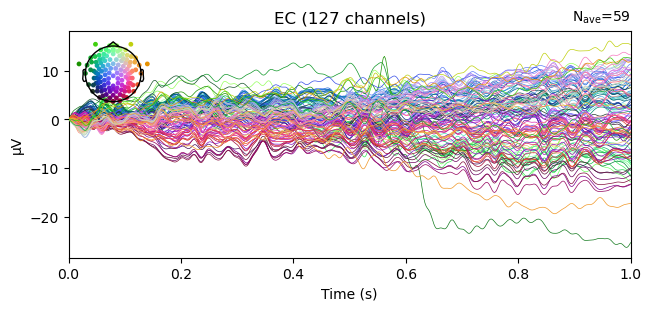

In [ ]:
eyes_open.plot(titles='EO')
eyes_closed.plot(titles='EC')

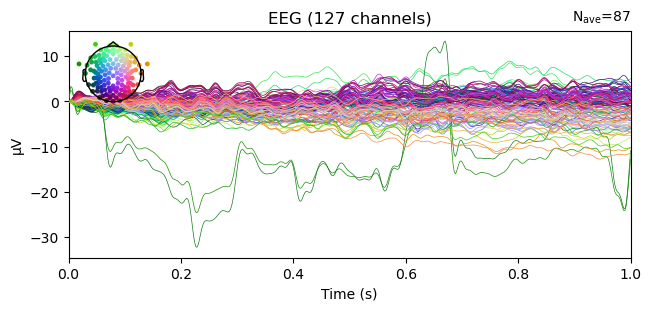

In [ ]:
evoked_contrast = mne.combine_evoked([eyes_open, eyes_closed], [0.5, -0.5])
# evoked_contrast.crop(-0.05, 0.25)
evoked_contrast.plot();

## Prepare beamforming of data


### Compute data covariance matrix
For beamforming, we need a **data covariance matrix**.

Since we want to contrast conditions, we will compute a so-called **common spatial filter** - meaning we will use a covariance matrix that was computed on both conditions jointly. In our case, that is all the data (faces + scrambled).

In [ ]:
data_cov = mne.compute_covariance(epochs, tmin=0.1, tmax=0.25,
                                  method='empirical', rank='info')

C:\Users\mahta\AppData\Local\Temp\ipykernel_14168\2971362811.py:1: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  data_cov = mne.compute_covariance(epochs, tmin=0.1, tmax=0.25,


Let's visualize our covariance matrices.

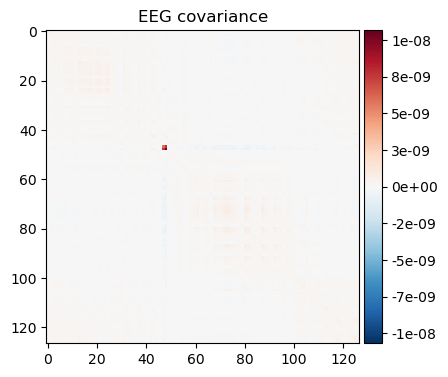

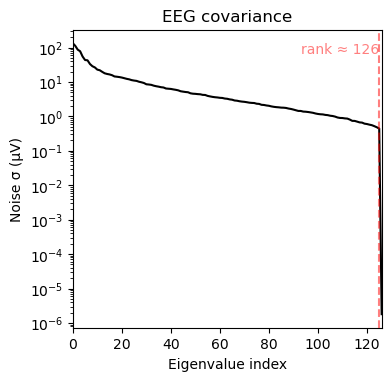

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [ ]:
mne.viz.plot_cov(data_cov, info=epochs.info)

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>This data is severely rank-deficient. Do you know where to see this? </li>
      <li>Can you guess why that is?</li>     
      <li>Do you know what that means for our beamformer?</li>
    </ul>
</div>

Let's keep the rank information around in a dictionary:

In [ ]:
ranks = mne.compute_rank(epochs, tol=1e-4)
print(ranks)

{'eeg': 126}


### Compute noise covariance matrix

Since we have two sensor types that we want to combine (gradiometers and magnetometers), we also need to compute a noise covariance matrix. That will be used for pre-whitening the data, data covariance matrix, and forward model. This is needed to take care of the different orders of magnitudes of the sensor types.

In [ ]:
noise_cov = mne.compute_covariance(epochs, 
                                   tmin=-.05, tmax=0.05,  # use as baseline
                                   method='empirical', 
                                   rank='info')

C:\Users\mahta\AppData\Local\Temp\ipykernel_14168\2709268337.py:1: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  noise_cov = mne.compute_covariance(epochs,


Lastly, we also need to read the forward model that we had saved!

In [ ]:
fwd_fname = os.path.join(data_path,
    'sub-02/sub-02-meg-fwd.fif')
fwd = mne.read_forward_solution(fwd_fname)

# Restrict forward solution to MEG channels only
fwd = mne.pick_types_forward(fwd, meg=False, eeg=True)

C:\Users\mahta\AppData\Local\Temp\ipykernel_14168\2511560678.py:2: RuntimeWarning: This filename (C:/Users/mahta/OneDrive/Documents/Work/Codes/IFT6168/TCL/data\RestingState_epo.fif) does not conform to MNE naming conventions. All forward files should end with -fwd.fif, -fwd.fif.gz, _fwd.fif, _fwd.fif.gz, -fwd.h5 or _fwd.h5
  fwd = mne.read_forward_solution(fwd_fname)


ValueError: No forward solutions in C:\Users\mahta\OneDrive\Documents\Work\Codes\IFT6168\TCL\data\RestingState_epo.fif

## Compute beamformer and apply to evoked data

Now we can compute the spatial filter (beamformer):

In [ ]:
from mne.beamformer import make_lcmv, apply_lcmv

In [ ]:
filters = make_lcmv(
    epochs.info, fwd,
    data_cov=data_cov, noise_cov=noise_cov,
    pick_ori='max-power', rank=ranks
)

ValueError: No channels match the selection.

We can apply the filter to one of our conditions to see the activation following picture presentation:

In [ ]:
stc_face = apply_lcmv(evoked=evoked_face, filters=filters)

We can plot the brain and time course using `stc_face.plot()`. You can explore the source reconstruction, e.g. by watching the activation as a movie. 

We crop the `stc` object in time.

In [ ]:
subjects_dir = os.path.join(data_path, 'freesurfer')
stc_face.crop(-0.05, 0.25).plot(subjects_dir=subjects_dir, subject='sub-02', hemi='both')

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Discuss the reconstruction: how does the activity spread?</li>
      <li> Do you know what do the negative and positive activations mean? </li>
    </ul>
</div>

Let's apply the same filter to our other condition. We can then subtract the activity from each other.

In [ ]:
%matplotlib qt
stc_scrambled = apply_lcmv(evoked=evoked_scrambled, filters=filters)
stc_scrambled.crop(-0.05, 0.25)

<SourceEstimate | 7237 vertices, subject : sub-02, tmin : -50.000000000000014 (ms), tmax : 249.99999999999997 (ms), tstep : 4.545454545454545 (ms), data shape : (7237, 67), ~3.8 MB>

In [ ]:
stc_diff = stc_face.copy()
stc_diff.data = np.abs(stc_face.data) - np.abs(stc_scrambled.data)

stc_diff.plot(subjects_dir=subjects_dir, subject='sub-02', hemi='both')

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Do the negative and positive activations mean the same as before?  </li>
      <li>Can you save a screenshot of the activity at 150 ms?  </li>
    </ul>
</div>

## Bonus epsiode: Minimum norm estimation (MNE)

### Prepare the MNE solution

To compute our inverse operator for minimum norm estimation, we need a noise covariance matrix. We could just use the one we already computed, but let's try something new: we compute the covariance matrix with different methods and let the algorithm choose the best one!

For more information, check out:

`Engemann DA & Gramfort A (2015): Automated model selection in covariance estimation and spatial whitening of MEG and EEG signals, NeuroImage. `

In [ ]:
noise_cov = mne.compute_covariance(epochs, tmax=0.05,
                                   method=['shrunk', 'empirical'],
                                   rank='info')
noise_cov['method']

'shrunk'

We can visualize the whitening of the evoked data, using this noise covariance matrix:

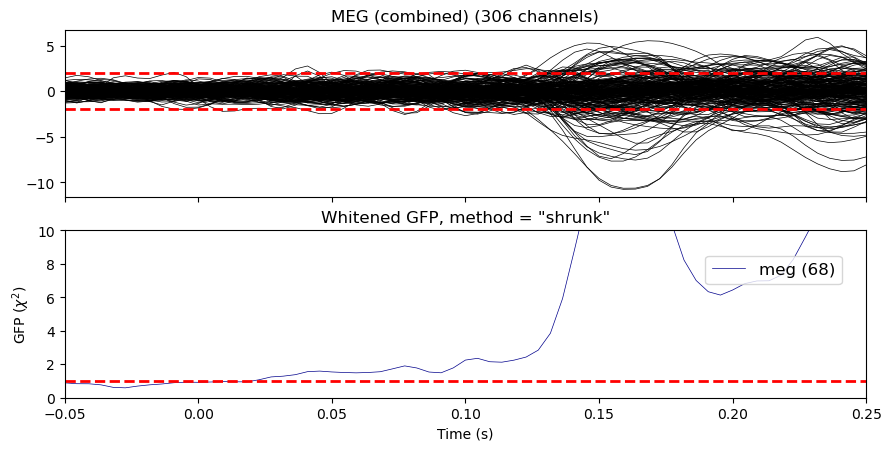

In [ ]:
%matplotlib inline
evoked_contrast.plot_white(noise_cov);

For the MNE source solution, we want to use a fixed forward operator:

In [ ]:
fwd_fixed = mne.convert_forward_solution(fwd, surf_ori=True)

### Compute MNE inverse operator and apply to evoked data

In [ ]:
from mne.minimum_norm import (make_inverse_operator, apply_inverse)

Minimum norm inverse models are independant
from the data (as they use just the noise covariance but not a data covariance matrix) and can therefore be
precomputed and applied to the data at a later stage.

We do not need to take special care of our conditions here.

In [ ]:
info = evoked_contrast.info
inverse_operator = make_inverse_operator(info, fwd_fixed, noise_cov,
                                         loose=0.2, depth=0.8)

Now let's apply this inverse operator to our evoked contrast:

In [ ]:
method = "dSPM"
snr = 3.
lambda2 = 1. / snr ** 2  # regularization
stc = apply_inverse(evoked_contrast, inverse_operator, lambda2,
                    method=method, pick_ori=None)
print(stc)

<SourceEstimate | 7237 vertices, subject : sub-02, tmin : -50.0 (ms), tmax : 250.0 (ms), tstep : 4.545454545454545 (ms), data shape : (7237, 67), ~3.8 MB>


Let us plot the results just as before with the beamformer:

In [ ]:
subjects_dir = os.path.join(data_path, 'freesurfer')
stc.plot(hemi='both', subjects_dir=subjects_dir, subject='sub-02')

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Compare the MNE reconstruction to the beamformer. What differences can you see? Can you explain them? </li>     
      <li>Run sLORETA on the same data and compare source localizations. </li>
    </ul>
</div>
